<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/Copie_de_CNN__Without_LagFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Preprocessed_Walmart.csv')

In [4]:
df.head()

,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Season_0,Season_1,Season_2
0,0,0,0,0,0,1,2010-02-05,1.057420,0,-0.995136,-1.713800,1.004175,0.056964,2,2010,0,0,1
1,0,0,0,0,0,1,2010-02-12,1.054348,1,-1.201170,-1.766089,1.007880,0.056964,2,2010,0,0,1
2,0,0,0,0,0,1,2010-02-19,1.001206,0,-1.124178,-1.840166,1.009074,0.056964,2,2010,0,0,1
3,0,0,0,0,0,1,2010-02-26,0.642828,0,-0.760907,-1.737766,1.009849,0.056964,2,2010,0,0,1
4,0,0,0,0,0,1,2010-03-05,0.899914,0,-0.767955,-1.598328,1.010624,0.056964,3,2010,0,1,0


**CNN**

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0326 - val_loss: 0.0191
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0136 - val_loss: 0.0123
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0077 - val_loss: 0.0085
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_

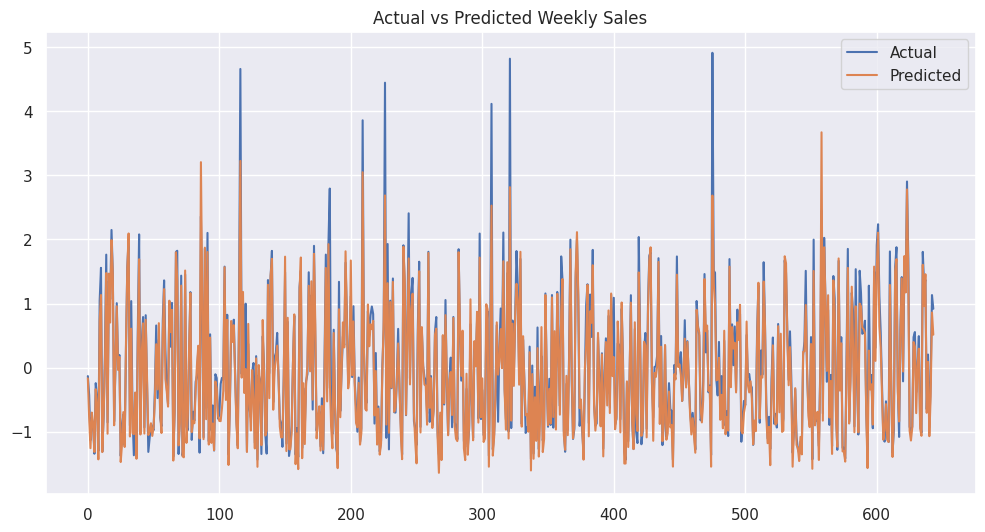

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (assuming df is already loaded)
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ✅ Ensure the number of samples is even
num_samples = X_scaled.shape[0]
if num_samples % 2 != 0:
    X_scaled = X_scaled[:-1]  # Remove last sample
    y_scaled = y_scaled[:-1]

# ✅ Reshape for CNN (2 time steps, features per step)
X_cnn = X_scaled.reshape(X_scaled.shape[0] // 2, 2, X_scaled.shape[1])
y_cnn = y_scaled[1::2]  # Align y values with reshaped X

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# ✅ Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
# ✅ Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# Predictions
predictions = model.predict(X_test)

# Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# ✅ Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# ✅ Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# ✅ Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


**Multi-Layer CNN**

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0267 - val_loss: 0.0125
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - val_loss: 0.0039
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9908e-04 - val_loss: 0.0017
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9687e-04 - val_loss: 0.0019
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.1633e-04 - val_loss: 0.0025
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0

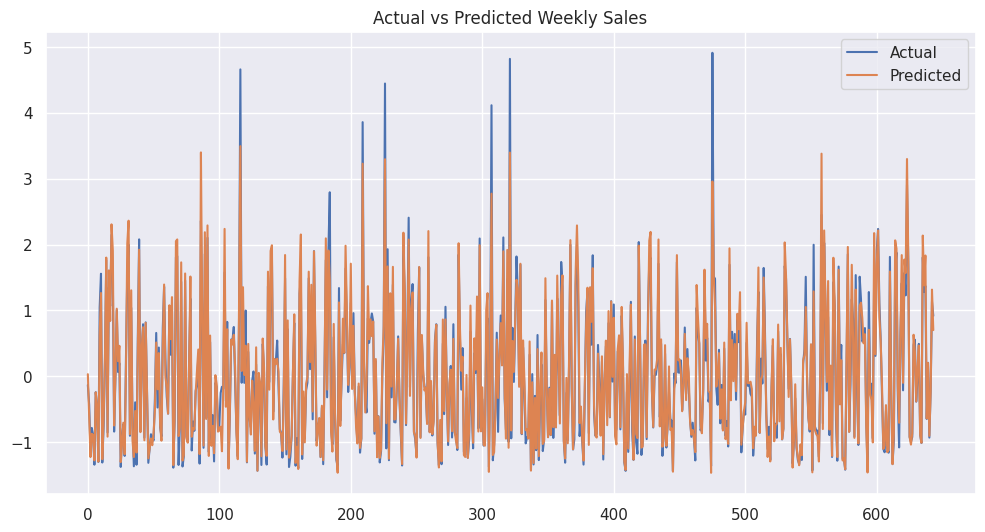

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 📌 Load dataset (assuming df is already loaded)
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# ✅ Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ✅ Ensure even number of samples
num_samples = X_scaled.shape[0]
if num_samples % 2 != 0:
    X_scaled = X_scaled[:-1]  # Remove last sample
    y_scaled = y_scaled[:-1]

# ✅ Reshape for CNN (2 time steps, features per step)
X_cnn = X_scaled.reshape(X_scaled.shape[0] // 2, 2, X_scaled.shape[1])
y_cnn = y_scaled[1::2]  # Align y values with reshaped X

# ✅ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# ✅ Define Multi-Layer CNN Model
# ✅ Define Multi-Layer CNN Model (Fixed)
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # 🟢 First pooling layer

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    # ❌ Removed the second MaxPooling1D to prevent shape issues

    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# ✅ Compile Model
model.compile(optimizer='adam', loss='mse')

# ✅ Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1, callbacks=[early_stopping]
)

# ✅ Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# ✅ Predictions
predictions = model.predict(X_test)

# ✅ Inverse transform predictions and true values
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# ✅ Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# ✅ MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# ✅ Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# ✅ Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


**Residual CNN (ResNet for Time Series)**

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.5439 - val_loss: 0.0373
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1438 - val_loss: 0.0351
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0871 - val_loss: 0.0432
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - val_loss: 0.0371
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0435 - val_loss: 0.0345
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0341 - val_loss: 0.0212
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0290 - val_loss: 0.0186
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0245 - val_loss: 0.0171
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - val_loss: 0.0160
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - val_loss: 0.0108
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - val_loss: 0.0093
Epoch 12/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

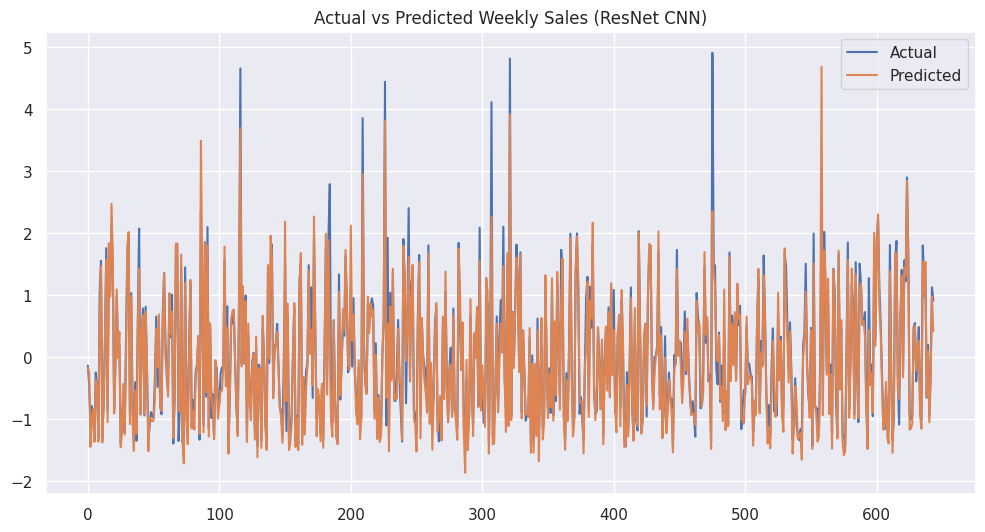

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (assuming df is already loaded)
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ✅ Ensure even number of samples for CNN reshaping
num_samples = X_scaled.shape[0]
if num_samples % 2 != 0:
    X_scaled = X_scaled[:-1]
    y_scaled = y_scaled[:-1]

# ✅ Reshape for CNN (2 time steps, features per step)
X_cnn = X_scaled.reshape(X_scaled.shape[0] // 2, 2, X_scaled.shape[1])
y_cnn = y_scaled[1::2]  # Align y values with reshaped X

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# ✅ Define Residual CNN Model
def build_residual_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # First Conv Block
    x = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)

    # Residual Block 1
    x_res = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(x)
    x_res = BatchNormalization()(x_res)
    x_res = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(x_res)
    x_res = BatchNormalization()(x_res)
    x = Add()([x, x_res])  # Residual connection

    # Residual Block 2
    x_res = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(x)
    x_res = BatchNormalization()(x_res)
    x_res = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(x_res)
    x_res = BatchNormalization()(x_res)
    x = Add()([x, x_res])  # Residual connection

    # Flatten and Dense Layers
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')

    return model

# Build model
model = build_residual_cnn(input_shape=(X_train.shape[1], X_train.shape[2]))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# Predictions
predictions = model.predict(X_test)

# Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# ✅ Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# ✅ MAPE computation with division check
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = np.abs(y_true) > 1e-5  # Avoid division by very small values
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# ✅ Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# ✅ Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales (ResNet CNN)')
plt.show()
